In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import shap
df = pd.read_csv('patients.csv')


In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)



LogisticRegression()

In [18]:

explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)


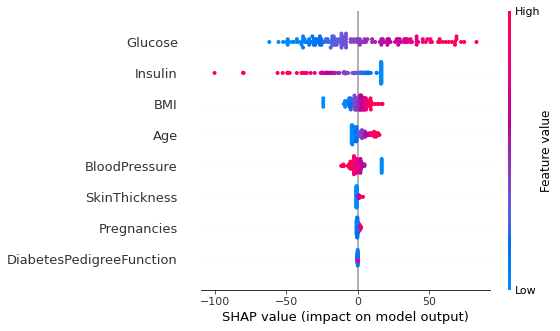

In [19]:
shap.summary_plot(shap_values, X_test)
